### Data Exploration and Analysis

In [34]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
pd_count_points_cleaned = pd.read_csv('../data/pd_count_points_cleaned.csv')

In [36]:
pd_raw_count_cleaned = pd.read_csv('../data/pd_raw_count_cleaned.csv')

In [37]:
pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')

/var/folders/_z/nz5spzqj2rl11n5lc_k1cwwc0000gn/T/ipykernel_77003/254017237.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')


In [39]:
pd_raw_count.query('road_type == "Minor"')

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
220944,800003,N,2018,2018-07-05,7,7,East of England,186,Bedford,B530,...,7,42,5.0,2,2,1,2,4,16.0,297.0
220945,800003,N,2018,2018-07-05,8,7,East of England,186,Bedford,B530,...,3,37,8.0,2,1,2,1,4,18.0,419.0
220946,800003,N,2018,2018-07-05,9,7,East of England,186,Bedford,B530,...,1,49,6.0,2,2,1,3,0,14.0,367.0
220947,800003,N,2018,2018-07-05,10,7,East of England,186,Bedford,B530,...,1,42,7.0,2,1,0,2,1,13.0,367.0
220948,800003,N,2018,2018-07-05,11,7,East of England,186,Bedford,B530,...,3,39,3.0,1,5,0,2,4,15.0,356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550051,999996,W,2009,2009-04-30,10,7,East of England,123,Essex,B1256,...,1,35,8.0,0,0,1,0,2,11.0,248.0
550052,999996,W,2009,2009-04-30,11,7,East of England,123,Essex,B1256,...,2,34,18.0,3,2,3,0,0,26.0,268.0
550053,999996,W,2009,2009-04-30,12,7,East of England,123,Essex,B1256,...,2,36,6.0,1,2,2,0,0,11.0,236.0
550054,999996,W,2009,2009-04-30,13,7,East of England,123,Essex,B1256,...,0,41,7.0,1,0,1,1,1,11.0,240.0


# Traffic Prediction 

Predict the volume of cars of a point at a given time:

    - What affect the number of cars at a specific point?
    - What are the daily trend /. Hourly trends / monthly trend / weekly trend
    - Does a closure at nearby point impact the traffic at that specific point
    - What affect weekend / bank holidays  have on the traffic at that specific point

In [ ]:
# # Summary Statistics
# pd_count_points.describe()
# pd_raw_count.describe()

In [ ]:
# pd_count_points['start_junction_road_name'].isnull().value_counts(normalize=True)

### Q1 What affect the number of cars at a specific point?

Let analyze the number of cars at specific points. The assumption we have is that the number of cars at a specfic point increases over time. Now, let plot check the hourly count of the cars in the top points.

In [43]:
pd_raw_count.head()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6003,N,2000,2000-03-31,7,7,East of England,208,Bedfordshire,M1,...,5,513,171.0,40,36,63,223,145,678.0,4006.0
1,6003,N,2000,2000-03-31,8,7,East of England,208,Bedfordshire,M1,...,11,436,203.0,17,11,60,180,119,590.0,4142.0
2,6003,N,2000,2000-03-31,9,7,East of England,208,Bedfordshire,M1,...,28,372,226.0,24,17,85,212,117,681.0,3325.0
3,6003,N,2000,2000-03-31,10,7,East of England,208,Bedfordshire,M1,...,26,457,202.0,26,22,80,262,157,749.0,3500.0
4,6003,N,2000,2000-03-31,11,7,East of England,208,Bedfordshire,M1,...,41,492,220.0,24,17,77,218,172,728.0,3693.0


In [46]:
pd_raw_count.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [82]:
pd_raw_count.hour =  pd.to_datetime(pd_raw_count.hour, unit='h', origin='2023-01-01').dt.strftime('%I %p')

In [48]:
hourly_average_traffic = pd_raw_count.groupby(['region_name', "hour"]).aggregate({'all_motor_vehicles': 'mean'})

In [56]:
hourly_average_traffic = hourly_average_traffic.reset_index().sort_values(by=["hour"])

In [66]:
hourly_average_traffic.hour =  pd.to_datetime(hourly_average_traffic.hour, unit='h', origin='2023-01-01').dt.strftime('%I %p')

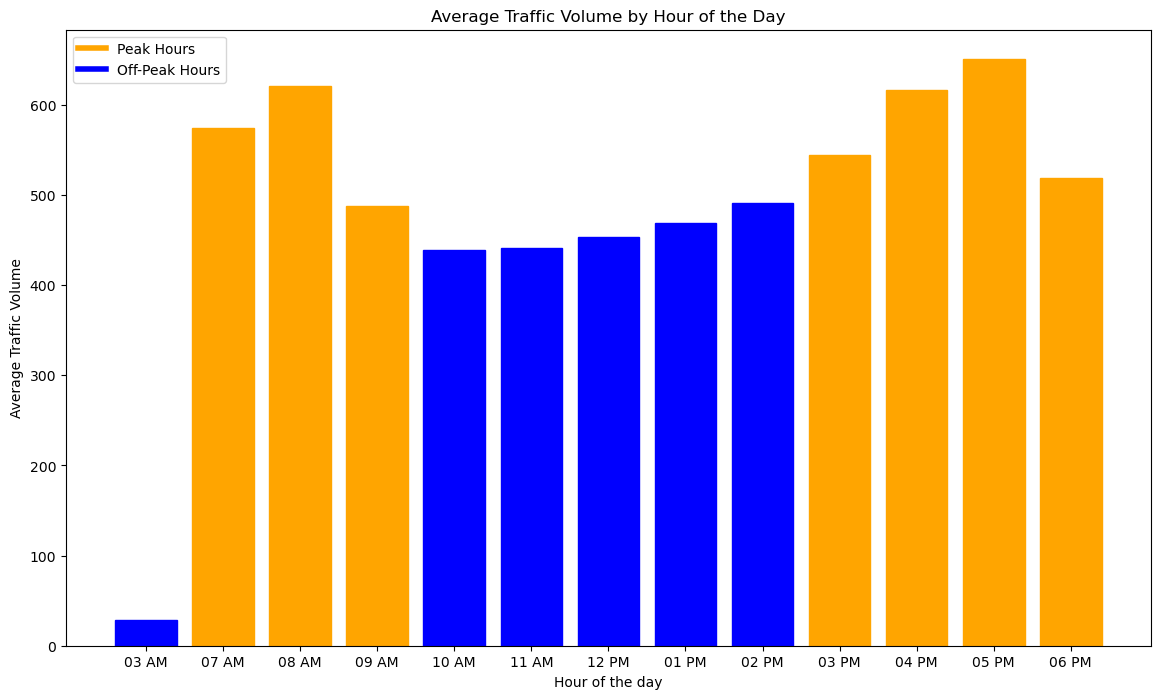

In [127]:
# generate a bar plot with matplotlib

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(hourly_average_traffic.hour, hourly_average_traffic.all_motor_vehicles, )
peak_hours = ["07 AM", "08 AM", "09 AM", "03 PM", "04 PM", "05 PM", "06 PM"]
# Assign colors to the bars based on whether they are in peak hours or not
for bar, hour in zip(bars, hourly_average_traffic.hour):
    if hour in peak_hours:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

# Create custom labels for the legend
custom_lines = [plt.Line2D([0], [0], color='orange', lw=4),
                plt.Line2D([0], [0], color='blue', lw=4)]

# Add the legend to the plot
ax.legend(custom_lines, ['Peak Hours', 'Off-Peak Hours'])
ax.set_ylabel('Average Traffic Volume')
ax.set_xlabel('Hour of the day')
ax.set_title('Average Traffic Volume by Hour of the Day')
plt.show()

The above picture describes the hourly traffic average per hour. The highest average traffic volume happen during the AM peak hours and the PM peak hours. This correlate well wiht hte TFL definition of peak hours.

__As from this graph, we can say that one of the factors that affect the traffic voalume is the time of the day.__

Let now check how the hourly average vary for each city in the region.

We will analyze the daily traffice volume per city, as well as the yearly volume per city. We will plot the city with the highest daily volume.

In [78]:
pd_raw_count.local_authority_name.unique()

array(['Bedfordshire', 'Central Bedfordshire', 'Hertfordshire',
       'Cambridgeshire', 'Luton', 'Essex', 'Suffolk', 'Southend-on-Sea',
       'Thurrock', 'Peterborough', 'Norfolk', 'Bedford'], dtype=object)

In [110]:
total_traffic_count_per_city = pd_raw_count.groupby(['local_authority_name', "hour"]).aggregate({'all_motor_vehicles': 'sum'}).reset_index()

In [111]:
total_traffic_count_per_city

,local_authority_name,hour,all_motor_vehicles
0,Bedford,01 PM,312874.0
1,Bedford,02 PM,329547.0
2,Bedford,03 PM,371682.0
3,Bedford,04 PM,426455.0
4,Bedford,05 PM,442235.0
...,...,...,...
140,Thurrock,08 AM,1298283.0
141,Thurrock,09 AM,1053107.0
142,Thurrock,10 AM,956229.0
143,Thurrock,11 AM,968854.0


In [112]:
total_traffic_count_per_city["is_on_peak"] = total_traffic_count_per_city.hour.isin(peak_hours)

In [113]:
total_traffic_count_per_city.sort_values

,local_authority_name,hour,all_motor_vehicles,is_on_peak
0,Bedford,01 PM,312874.0,False
1,Bedford,02 PM,329547.0,False
2,Bedford,03 PM,371682.0,True
3,Bedford,04 PM,426455.0,True
4,Bedford,05 PM,442235.0,True
...,...,...,...,...
140,Thurrock,08 AM,1298283.0,True
141,Thurrock,09 AM,1053107.0,True
142,Thurrock,10 AM,956229.0,False
143,Thurrock,11 AM,968854.0,False


In [114]:
total_traffic_count_per_city = total_traffic_count_per_city.groupby(["local_authority_name", "is_on_peak"]).agg({"all_motor_vehicles": "sum"}).reset_index()

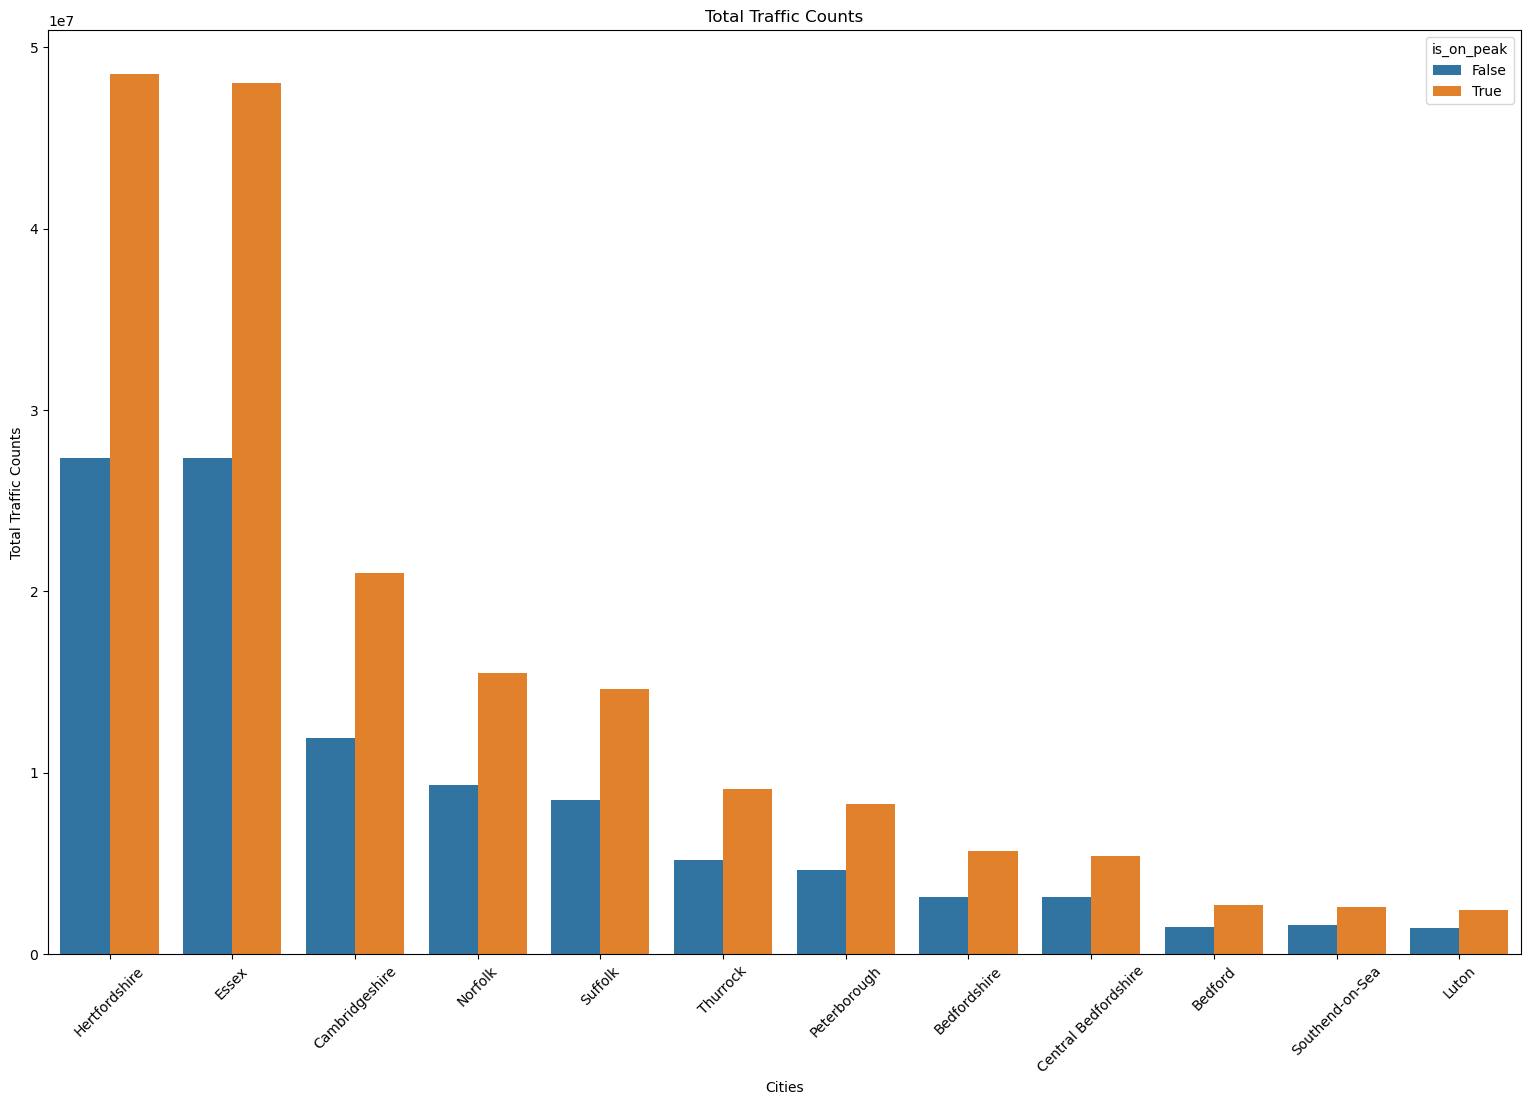

In [123]:
plt.figure(figsize=(19,12))
ax =  sns.barplot(x='local_authority_name', y='all_motor_vehicles', hue='is_on_peak', data=total_traffic_count_per_city.sort_values('all_motor_vehicles', ascending=False))
ax.set_title("Total Traffic Counts")
ax.set_xlabel("Cities")
ax.set_ylabel("Total Traffic Counts")
ax.tick_params(axis='x', labelrotation=45)
plt.show()

From the first analysis, we can see that the region with the higest number of vehiccles are hedforshire, Esses, cambridegshire, and the one with the lowest number of vehiccles are the counties of Bedford, and Lutton. However this picture need to be taken with a grain of salt, as the size of the region may affect the number of vehicles in that region.

To get more insight, we can complemment this data with the region size and create a column name vehiculles per size, and visualize if we will have the same trend with that column.